# TITANIC PREDICTION

In [56]:
#Data Analysis and wrangling
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

**Data Acquisition**

We start by acquiring the datasets individually and also combine them:

In [38]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
ds=[train,test]

**Analysing data**

- What are the columns available?

In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- View the data

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- What are the size of dataset?

In [41]:
train.shape

(891, 12)

- What are the types of variables?

In [42]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- What columns have duplicated rows?

In [43]:
train[train.duplicated].count()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

It was not identified duplicated rows.

- What columns have null values?

In [44]:
train.isnull().values.any()

True

In [45]:
#How many columns? 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Analyse of numerical features

In [46]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights of numerical feature:**
- PassengerId is a unique value that is from 1 to 891
- Survived has 2 values, 1 or 0, it's a target feature
- Although Pclass is classified as a numerical variable, she is categorical because has only three categories (1,2,3).
- Few elderly passengers, the most of them are younger because the distribuition of 75% has passengers with 38 years.
- The most of passengers are alone since 75% of  SibSp and Parch are 1 and 0.

- Analyse of categorical features

In [47]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Insights of categorical feature:**
- Name is a unique value 
- Sex variable has two possibility : male and female with predominant male.
- Embarked take three values with S the top.
- Ticket and Cabine has duplicates values

- Target variable

In [48]:
fa = round(train['Survived'].value_counts(normalize=True)*100)
fa

0    62.0
1    38.0
Name: Survived, dtype: float64

-The percent of people don´t survived is higher.

**Pclass feature**

In [ ]:
#How is the distribution for class in survived?

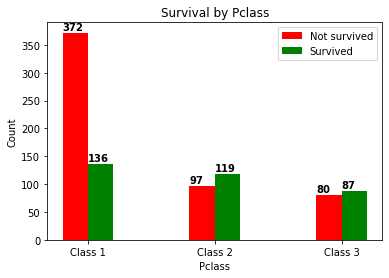

In [76]:
y1_counts = train.loc[train['Survived'] == 0, 'Pclass'].value_counts()
y2_counts = train.loc[train['Survived'] == 1, 'Pclass'].value_counts()

classes = ['Class 1', 'Class 2', 'Class 3']
x = np.arange(len(classes))
width = 0.2

plt.bar(x, y1_counts, width, color='r', label='Not survived')
plt.bar(x + width, y2_counts, width, color='g', label='Survived')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival by Pclass')
plt.xticks(x + width / 2, labels=classes)
plt.legend()

# Add values
for i, v in enumerate(y1_counts):
    plt.text(i - 0.1, v + 5, str(v), color='black', fontweight='bold')

for i, v in enumerate(y2_counts):
    plt.text(i + width - 0.1, v + 5, str(v), color='black', fontweight='bold')

plt.show()